In [41]:
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import time

# Parameters
# N = 3   # Number of fermions
t = 1.0 # Hopping amplitude
U = 0.5 # On-site interaction energy

# Define the fermionic operators
def fermion_operator(op, i, L):
    """
    Creates a fermionic operator acting on site i.
    op: 'c' or 'cdag' for annihilation or creation operator, respectively.
    i: the site index.
    """
    if op == 'c':
        return np.kron(np.kron(np.eye(2**(i-1)), np.array([[0, 1], [0, 0]])), np.eye(2**(L-i)))
    elif op == 'cdag':
        return np.kron(np.kron(np.eye(2**(i-1)), np.array([[0, 0], [1, 0]])), np.eye(2**(L-i)))
    elif op == 'n':
        return np.kron(np.kron(np.eye(2**(i-1)), np.array([[0, 0], [0, 1]])), np.eye(2**(L-i)))
    else:
        raise ValueError("Invalid operator type")

def fermihubbard(L):
    start = time.time()
    # Build the Fermi-Hubbard Hamiltonian
    H = np.zeros((2**L, 2**L))
    for i in range(1, L):
        H -= t * (fermion_operator('cdag', i, L) @ fermion_operator('c', i+1, L) + fermion_operator('cdag', i+1, L) @ fermion_operator('c', i, L))
    for i in range(1, L+1):
        H += U * fermion_operator('n', i, L) @ (fermion_operator('n', i, L))

    # Diagonalize the Hamiltonian using Lanczos algorithm
    eigenvals, eigenvecs = eigsh(H, k=1, which='SA')
    timetaken = time.time() - start
    # Print the ground state energy
    print("Ground state energy for" , L , "sites := " , eigenvals[0])
    print("Time Taken = " , timetaken)
    
    return (eigenvals[0], timetaken)


In [42]:
N = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
E = []
T = []
for i in N:
    energy, timetaken = fermihubbard(i)
    E.append(energy)
    T.append(timetaken)

Ground state energy for 2 sites :=  -0.5000000000000001
Time Taken =  0.0011630058288574219
Ground state energy for 3 sites :=  -0.9142135623730949
Time Taken =  0.0
Ground state energy for 4 sites :=  -1.23606797749979
Time Taken =  0.0020067691802978516
Ground state energy for 5 sites :=  -1.7320508075688774
Time Taken =  0.0026750564575195312
Ground state energy for 6 sites :=  -2.048917339522305
Time Taken =  0.003126382827758789
Ground state energy for 7 sites :=  -2.527339492125849
Time Taken =  0.025172948837280273
Ground state energy for 8 sites :=  -2.911474127809772
Time Taken =  0.06300783157348633
Ground state energy for 9 sites :=  -3.3137515146750482
Time Taken =  0.26076555252075195
Ground state energy for 10 sites :=  -3.742044506785688
Time Taken =  1.2609443664550781
Ground state energy for 11 sites :=  -4.09575411272515
Time Taken =  6.5567262172698975
Ground state energy for 12 sites :=  -4.555156450048112
Time Taken =  36.29367518424988
Ground state energy for 13 s

In [19]:
# #itensor results
# L = 2: After sweep 100 energy=-0.5  maxlinkdim=2 maxerr=0.00E+00 time=0.001
# L = 3: After sweep 100 energy=-0.914213562373095  maxlinkdim=2 maxerr=7.77E-16 time=0.006
# L = 4: After sweep 100 energy=-1.2360679774997896  maxlinkdim=4 maxerr=3.09E-16 time=0.012
# L = 5: After sweep 100 energy=-1.732050807568878  maxlinkdim=4 maxerr=1.74E-16 time=0.004
# L = 6: After sweep 100 energy=-2.048917339522305  maxlinkdim=4 maxerr=1.70E-16 time=0.006
# L = 7: After sweep 100 energy=-2.5273394921258476  maxlinkdim=8 maxerr=9.52E-17 time=0.021
# L = 8: After sweep 100 energy=-2.911474127809772  maxlinkdim=8 maxerr=8.91E-16 time=0.039
# L = 9: After sweep 100 energy=-3.3137515134882376  maxlinkdim=14 maxerr=7.93E-11 time=0.065
# L = 10: After sweep 100 energy=-3.742044505912703  maxlinkdim=15 maxerr=6.29E-11 time=0.079
# L = 11: After sweep 100 energy=-4.0957541110657685  maxlinkdim=21 maxerr=7.02E-11 time=0.035
# L= 12: After sweep 100 energy=-4.555156448620361  maxlinkdim=22 maxerr=9.10E-11 time=0.111
# L = 13: After sweep 100 energy=-4.930203605684112  maxlinkdim=22 maxerr=4.32E-11 time=0.114

ValueError: operands could not be broadcast together with shapes (512,512) (64,64) (512,512) 

In [62]:
itenE = [-0.5,-0.914213562373095, -1.2360679774997896, -1.732050807568878 , -2.048917339522305, -2.5273394921258476, -2.911474127809772, -3.3137515134882376, -3.742044505912703,-4.0957541110657685,  -4.555156448620361, -4.930203605684112]
itenT = [0.085476, 0.207850, 0.352496, 0.474223,0.699674, 0.879567, 1.163812, 1.800714, 2.143477,3.130721,3.75491, 4.360087]

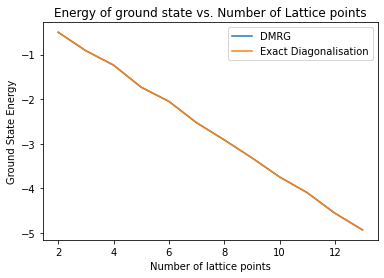

In [60]:
plt.plot(N, itenE, label = 'DMRG')
plt.plot(N, E, label = 'Exact Diagonalisation')
plt.title("Energy of ground state vs. Number of Lattice points")
plt.xlabel("Number of lattice points")
plt.ylabel("Ground State Energy")
plt.legend()
plt.show()

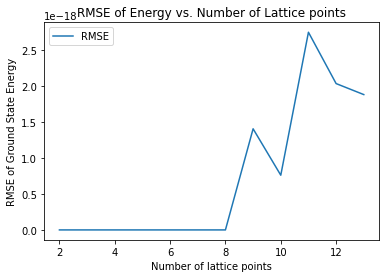

In [59]:
RMSE = (np.asarray(itenE) - np.asarray(E))**2

plt.plot(N, RMSE, label = 'RMSE')
plt.title("RMSE of Energy vs. Number of Lattice points")
plt.xlabel("Number of lattice points")
plt.ylabel("RMSE of Ground State Energy")
plt.legend()
plt.show()

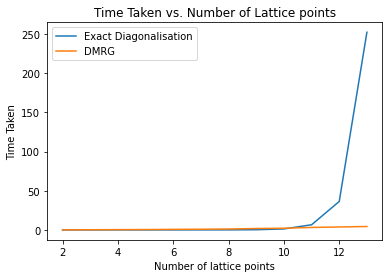

In [63]:
plt.plot(N, T, label = 'Exact Diagonalisation')
plt.plot(N, itenT, label = 'DMRG')
plt.title("Time Taken vs. Number of Lattice points")
plt.xlabel("Number of lattice points")
plt.ylabel("Time Taken")
plt.legend()
plt.show()